In [19]:
%matplotlib inline
import numpy as np
from matplotlib import pylab
import matplotlib.pyplot as plt
import seaborn




class Relu():

    def __init__(self, n_coefficients=9, domain=(-100, 100)):
        self.cache = None
        self.coeff = self.compute_coefficients_relu(n_coefficients, domain)
        self.coeff_dir = np.multiply(self.coeff, range(len(self.coeff))[::-1])[:-1]

    def initialize(self):
        pass

    def forward(self, x):
        x_powers = np.array([x ** i for i in range(len(self.coeff))][::-1])
        y = x_powers.dot(self.coeff)
        self.cache = x_powers[1:]
        return y

    def backward(self, d_y, learning_rate):
        x_powers = self.cache
        d_x = d_y * x_powers.dot(self.coeff_dir)
        return d_x
    
    @staticmethod
    def compute_coefficients_relu(n_coefficients, domain):
        assert domain[0] < 0 < domain[1]
        x = list(range(domain[0], domain[1]))
        y = [0] * abs(domain[0]) + list(range(0, domain[1]))
        return np.polyfit(x, y, n_coefficients)







In [25]:
relu_layer = Relu()
x = np.arange(-10,10)
y = relu_layer.forward(x)
y

ValueError: shapes (10,20) and (10,) not aligned: 20 (dim 1) != 10 (dim 0)

In [12]:
def poly_approx(x, coefficients): 
    return sum([coefficient * x ** (len(coefficients) - 1 - i) for i, coefficient in enumerate(coefficients)])

    
def compute_coefficients_ReLU(n_coefficients, domain=(-100, 100)):
    assert domain[0] < 0 < domain[1]
    x = list(range(domain[0], domain[1]))
    y = [0] * abs(domain[0]) + list(range(0, domain[1]))
    return np.polyfit(x, y, n_coefficients), x, y


def plot_ReLU(coefficients, x, y):
    ReLU = np.poly1d(coefficients)
    x_new = np.linspace(x[0], x[-1], 50)
    y_new = ReLU(x_new)

    pylab.rcParams['figure.figsize'] = (15, 10)
    plt.plot(x,y, x_new, y_new)
    pylab.title('Coefficients: {}'.format(len(coefficients)-1))
    ax = plt.gca()
    fig = plt.gcf()
    
coefficients, x, y = compute_coefficients_ReLU(9, (-300, 300))
print(coefficients)
print(poly_approx(10, coefficients))

[-6.26908926e-22 -7.63713651e-18  1.06893581e-16  1.58466380e-12
 -5.94142031e-12 -1.18830167e-07  1.18816303e-07  4.93518136e-03
  4.99383132e-01  1.00921468e+01]
15.578427719504926


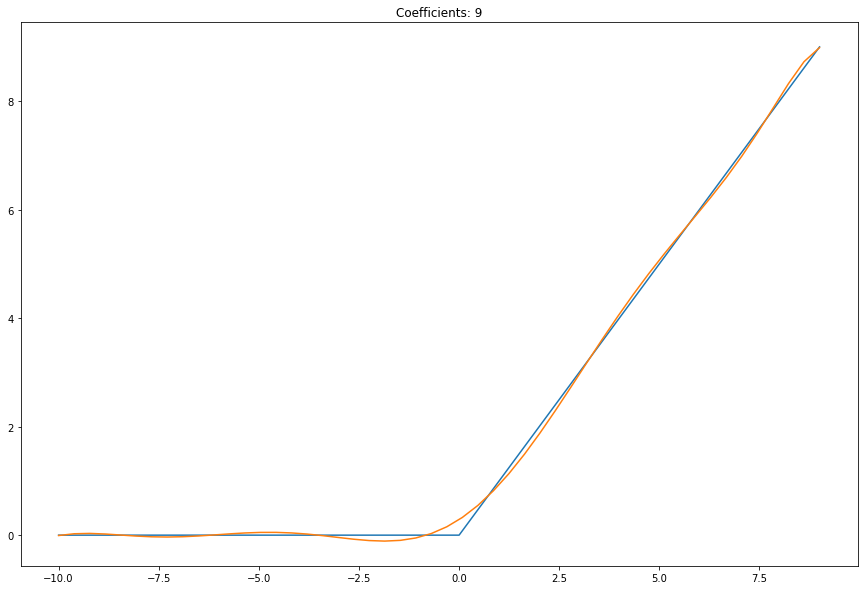

In [13]:
coefficients, x, y = compute_coefficients_ReLU(9, (-10, 10))   
plot_ReLU(coefficients, x, y)

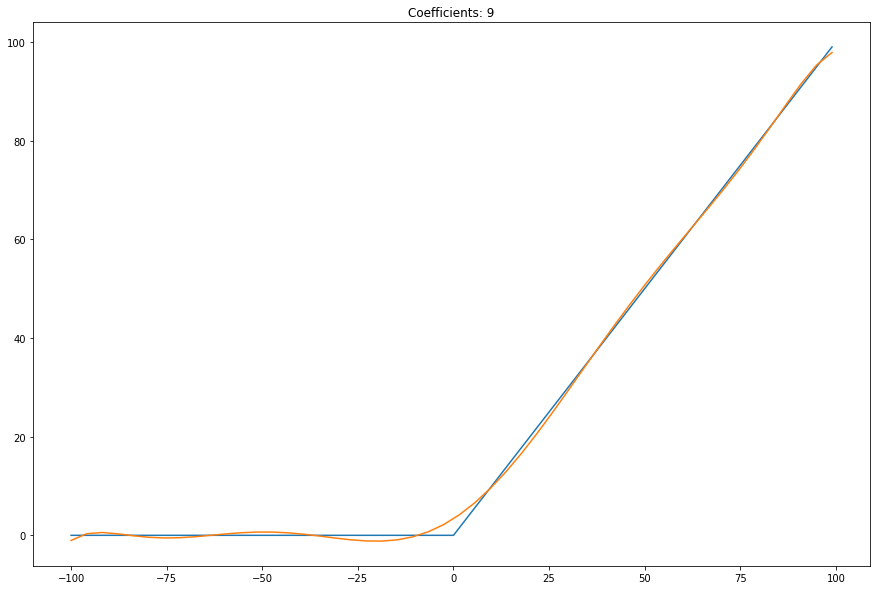

In [14]:
coefficients, x, y = compute_coefficients_ReLU(9, (-100, 100))   
plot_ReLU(coefficients, x, y)

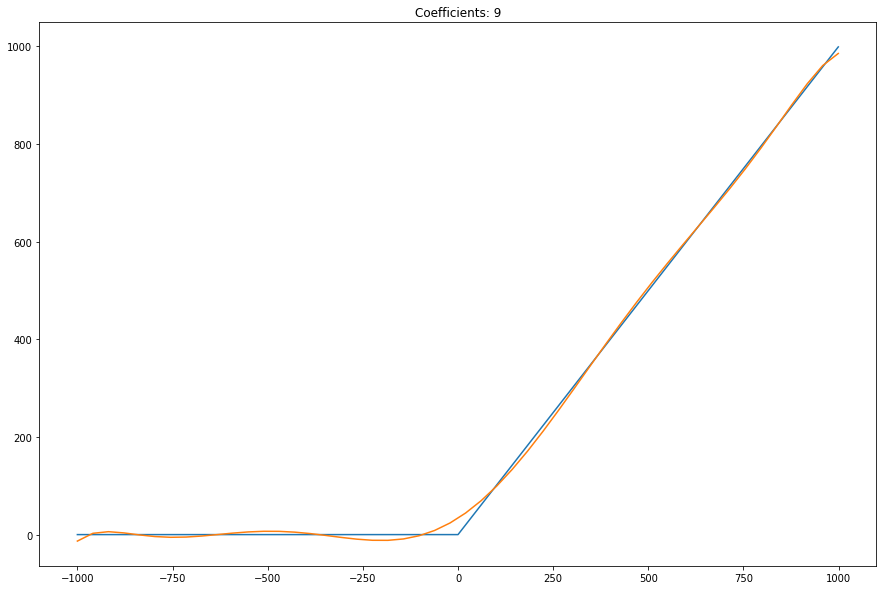

In [15]:
coefficients, x, y = compute_coefficients_ReLU(9, (-1000, 1000))   
plot_ReLU(coefficients, x, y)